In [1]:
import warnings
# hide powerlaw's 'invalid value encountered in true divide' warnings
warnings.filterwarnings('ignore')

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import powerlaw
import pylandstats as pls
import seaborn as sns
import swisslandstats as sls

from swiss_urbanization.data import settings

sns.set()

In [2]:
urban_class = settings.EXTRACTS_URBAN
nodata = settings.EXTRACTS_NODATA

agglomeration_slugs = ['bern', 'lausanne', 'zurich']

In [3]:
agglomeration_dict = {}
for agglomeration_slug in agglomeration_slugs:
    ldf = sls.read_csv(
        f'../data/processed/agglomeration_extracts/{agglomeration_slug}.csv')
    landscapes = []
    dates = []
    for urban_nonurban_column in ldf.columns[ldf.columns.str.startswith('AS')]:
        landscapes.append(
            pls.Landscape(
                ldf.to_ndarray(urban_nonurban_column, nodata=nodata),
                res=ldf.res, nodata=nodata))
        # get the year of the snapshot by taking the most recurrent timestamp
        # (year) among the pixels
        dates.append(
            ldf['FJ' + urban_nonurban_column[2:4]].value_counts().index[0])
    agglomeration_dict[agglomeration_slug] = pls.SpatioTemporalAnalysis(
        landscapes, dates=dates)

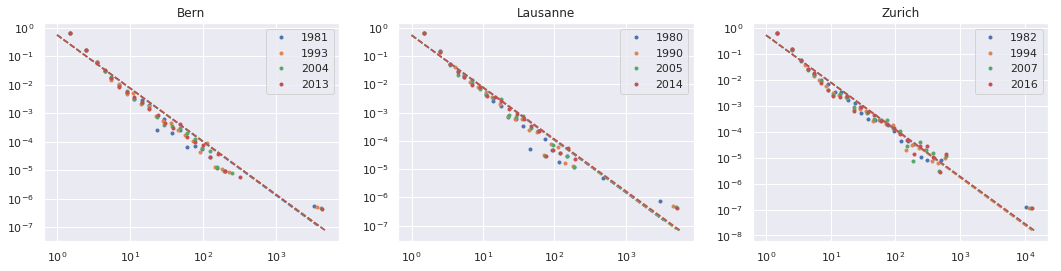

In [70]:
num_cities = len(agglomeration_slugs)
figwidth, figheight = plt.rcParams['figure.figsize']
current_palette = sns.color_palette()
fig = plt.figure(figsize=(num_cities * figwidth, figheight))

for i, agglomeration_slug in enumerate(agglomeration_slugs, start=1):
    # print(agglomeration_slug.capitalize())
    sta = agglomeration_dict[agglomeration_slug]
    ax = fig.add_subplot(1, num_cities, i)
    for k, (date, landscape) in enumerate(zip(sta.dates, sta.landscapes)):
        area_ser = landscape.area(urban_class)
       
        ax.set_title(agglomeration_slug.capitalize())
        color = current_palette[k]

        powerlaw.plot_pdf(area_ser, ax=ax, color=color,
                          linestyle='None', marker='.', label=date)
        # `xmin=1` because patches cannot have 0 area
        # `discrete=True` because patches are groups of pixels
        fit = powerlaw.Fit(
            area_ser.values, xmin=1, discrete=True, verbose=False)        
        fit.power_law.plot_pdf(ax=ax, color=color, linestyle='--')

    ax.legend()

In [ ]:
def powerlaw_plot(data, xmin=None, ax=ax, **kwargs):
    fit = powerlaw.Fit(area_ser.values, xmin=1, discrete=True, verbose=False)
    # xmin = fit.xmin
    
    # print(f'Scaling range covers patches larger than {xmin} hec, namely '
            #       f'{np.sum(area_ser < xmin) * 100 / len(area_ser)}% of patches')
       
    ax.set_title(agglomeration_slug.capitalize())
    color = current_palette[k]
    
    powerlaw.plot_pdf(area_ser, ax=ax, color=color,
                      linestyle='None', marker='.', label=date)
    # fit.plot_pdf(ax=ax, linear_bins=False, color=color, linestyle='None',
                   #                marker='.', label=date)
    fit.power_law.plot_pdf(ax=ax, color=color, linestyle='--')

Bern
Scaling range covers patches larger than 13.0 hec, namely 96.50751547303271% of patches
Scaling range covers patches larger than 5.0 hec, namely 90.53930530164534% of patches
Scaling range covers patches larger than 4.0 hec, namely 87.56830601092896% of patches
Scaling range covers patches larger than 5.0 hec, namely 90.46112115732369% of patches

Lausanne
Scaling range covers patches larger than 5.0 hec, namely 89.0992835209826% of patches
Scaling range covers patches larger than 8.0 hec, namely 92.95039164490862% of patches
Scaling range covers patches larger than 14.0 hec, namely 95.41237113402062% of patches
Scaling range covers patches larger than 15.0 hec, namely 95.25547445255475% of patches

Zurich
Scaling range covers patches larger than 4.0 hec, namely 85.69643972517177% of patches


Scaling range covers patches larger than 4.0 hec, namely 86.93708080485467% of patches
Scaling range covers patches larger than 4.0 hec, namely 86.55824759376037% of patches
Scaling range covers patches larger than 26.0 hec, namely 96.18797239566217% of patches



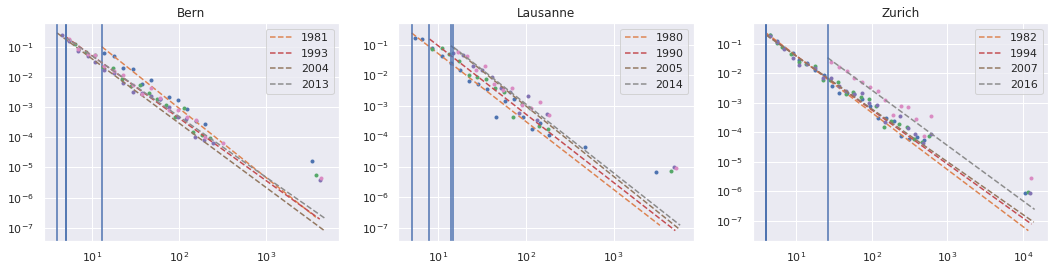

In [10]:
num_cities = len(agglomeration_slugs)
figwidth, figheight = plt.rcParams['figure.figsize']
current_palette = sns.color_palette()
fig = plt.figure(figsize=(num_cities*figwidth, figheight))

for i, agglomeration_slug in enumerate(agglomeration_slugs, start=1):
    print(agglomeration_slug.capitalize())
    sta = agglomeration_dict[agglomeration_slug]
    # fig, ax = plt.subplots()
    ax = fig.add_subplot(1, num_cities, i)
    for date, landscape in zip(sta.dates, sta.landscapes):
        area_ser = landscape.area(urban_class)

        fit = powerlaw.Fit(area_ser.values, verbose=False)
        xmin = fit.xmin

        print(
            f'Scaling range covers patches larger than {xmin} hec, namely '
            f'{np.sum(area_ser < xmin) * 100 / len(area_ser)}% of patches'
        )

        ax1.set_title(agglomeration_slug.capitalize())
        color = current_palette[i-1]
        fit.plot_pdf(
            ax=ax, linear_bins=False, color=current_palette, linestyle='None', marker='.')
        fit.power_law.plot_pdf(ax=ax, color=current_palette, linestyle='--', label=date)
        # ax.axvline(xmin)

    ax1.legend()
    print()